<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [2]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-08-25 10:17:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  39.8MB/s    in 4.4s    

2025-08-25 10:17:19 (34.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


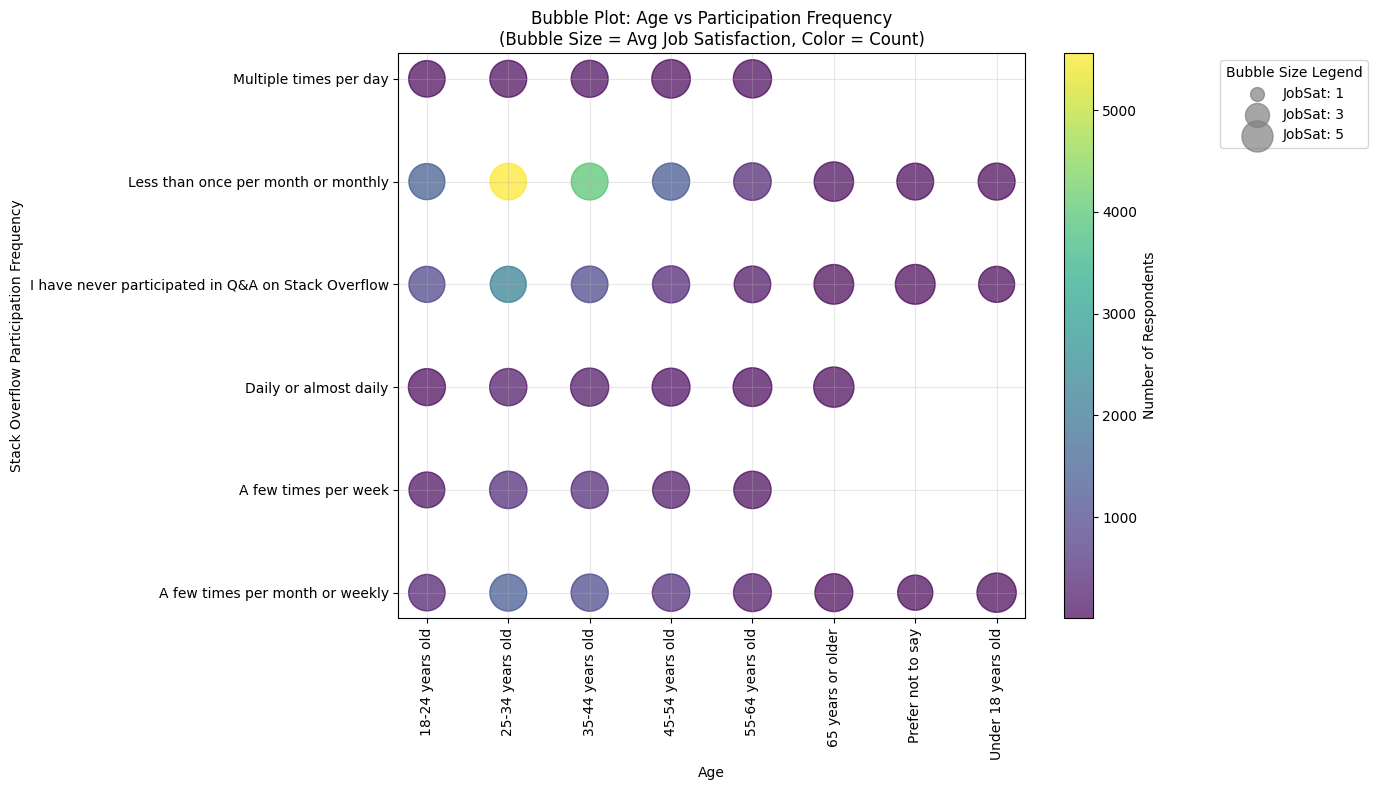

In [22]:
if 'SOPartFreq' in df.columns and 'Age' in df.columns and 'JobSat' in df.columns:
    # Clean and prepare data
    freq_data = df[['SOPartFreq', 'Age', 'JobSat']].dropna()

    # Group by participation frequency and age, calculate average job satisfaction
    grouped_data = freq_data.groupby(['SOPartFreq', 'Age']).agg(
        count=('JobSat', 'size'),
        avg_jobsat=('JobSat', 'mean')
    ).reset_index()

    # Filter for meaningful groups (at least 5 respondents)
    grouped_data = grouped_data[grouped_data['count'] >= 5]

    plt.figure(figsize=(14, 8))
    scatter = plt.scatter(grouped_data['Age'], grouped_data['SOPartFreq'],
                         s=grouped_data['avg_jobsat']*100,  # Bubble size based on job satisfaction
                         alpha=0.7,
                         c=grouped_data['count'],  # Color based on number of respondents
                         cmap='viridis')

    plt.colorbar(scatter, label='Number of Respondents')
    plt.title('Bubble Plot: Age vs Participation Frequency\n(Bubble Size = Avg Job Satisfaction, Color = Count)')
    plt.xlabel('Age')
    plt.xticks(rotation=90)
    plt.ylabel('Stack Overflow Participation Frequency')
    plt.grid(True, alpha=0.3)

    # Add legend for bubble sizes
    for jobsat in [1, 3, 5]:
        plt.scatter([], [], s=jobsat*100, alpha=0.7, label=f'JobSat: {jobsat}', c='gray')
    plt.legend(title='Bubble Size Legend', bbox_to_anchor=(1.3, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found for this analysis")

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


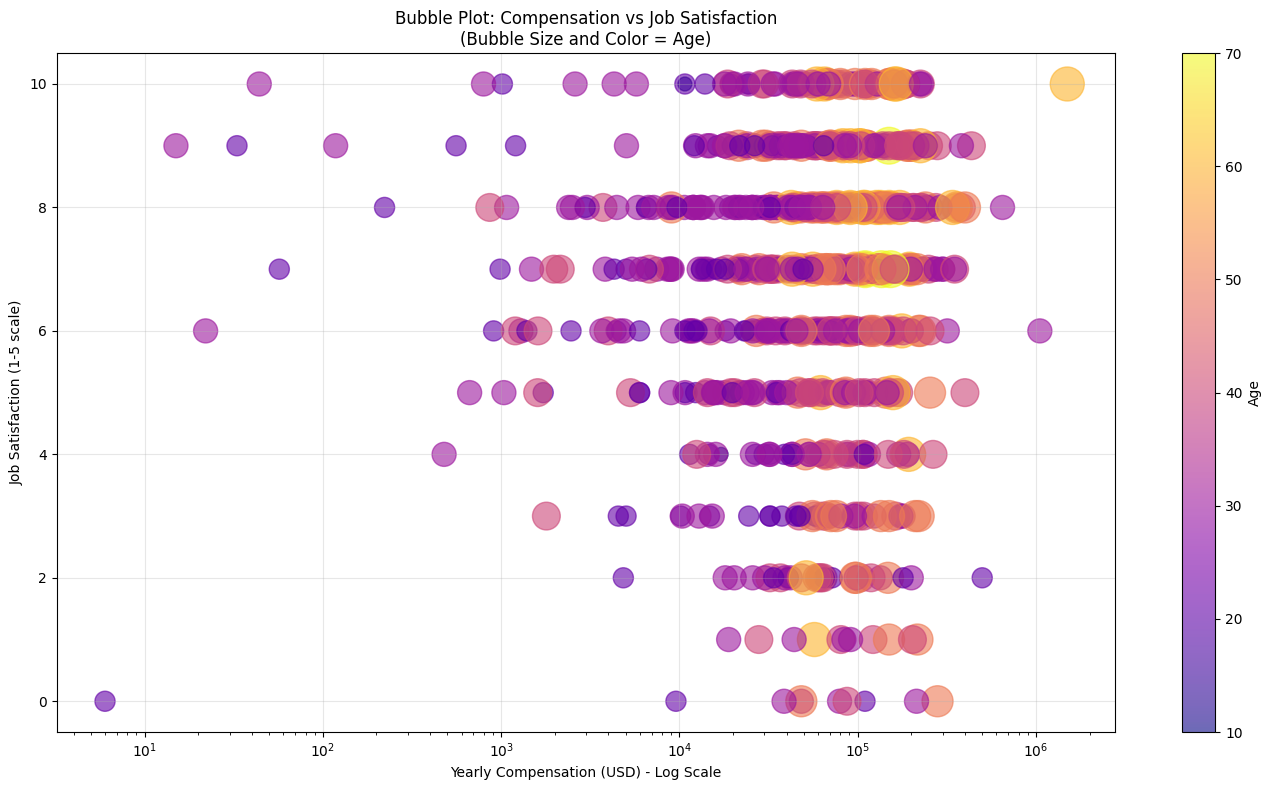

In [32]:
if 'ConvertedCompYearly' in df.columns and 'JobSat' in df.columns and 'Age' in df.columns:
    # Clean data
    comp_data = df[['ConvertedCompYearly', 'JobSat', 'Age']].dropna()
    comp_data = comp_data[comp_data['ConvertedCompYearly'] > 0]  # Remove invalid compensation

    # Convert Age ranges to a numerical representation for plotting
    def age_to_numeric(age_range):
        if isinstance(age_range, str):
            if 'Under 18' in age_range:
                return 10  # Approximate midpoint
            elif '18-24' in age_range:
                return 21
            elif '25-34' in age_range:
                return 30
            elif '35-44' in age_range:
                return 40
            elif '45-54' in age_range:
                return 50
            elif '55-64' in age_range:
                return 60
            elif '65 years or older' in age_range:
                return 70 # Approximate midpoint
        return None # Handle cases where age_range is not a string or recognized format

    comp_data['Age_numeric'] = comp_data['Age'].apply(age_to_numeric)
    comp_data = comp_data.dropna(subset=['Age_numeric']) # Remove rows where age couldn't be converted

    # Sample data for better visualization (if too many points)
    if len(comp_data) > 1000:
        comp_data = comp_data.sample(1000, random_state=42)


    plt.figure(figsize=(14, 8))
    scatter = plt.scatter(comp_data['ConvertedCompYearly'], comp_data['JobSat'],
                         s=comp_data['Age_numeric']*10,  # Bubble size based on age
                         alpha=0.6,
                         c=comp_data['Age_numeric'],  # Color based on age
                         cmap='plasma')

    plt.colorbar(scatter, label='Age')
    plt.title('Bubble Plot: Compensation vs Job Satisfaction\n(Bubble Size and Color = Age)')
    plt.xlabel('Yearly Compensation (USD) - Log Scale')
    plt.ylabel('Job Satisfaction (1-5 scale)')
    plt.xscale('log')  # Use log scale for better visualization
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found for this analysis")

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



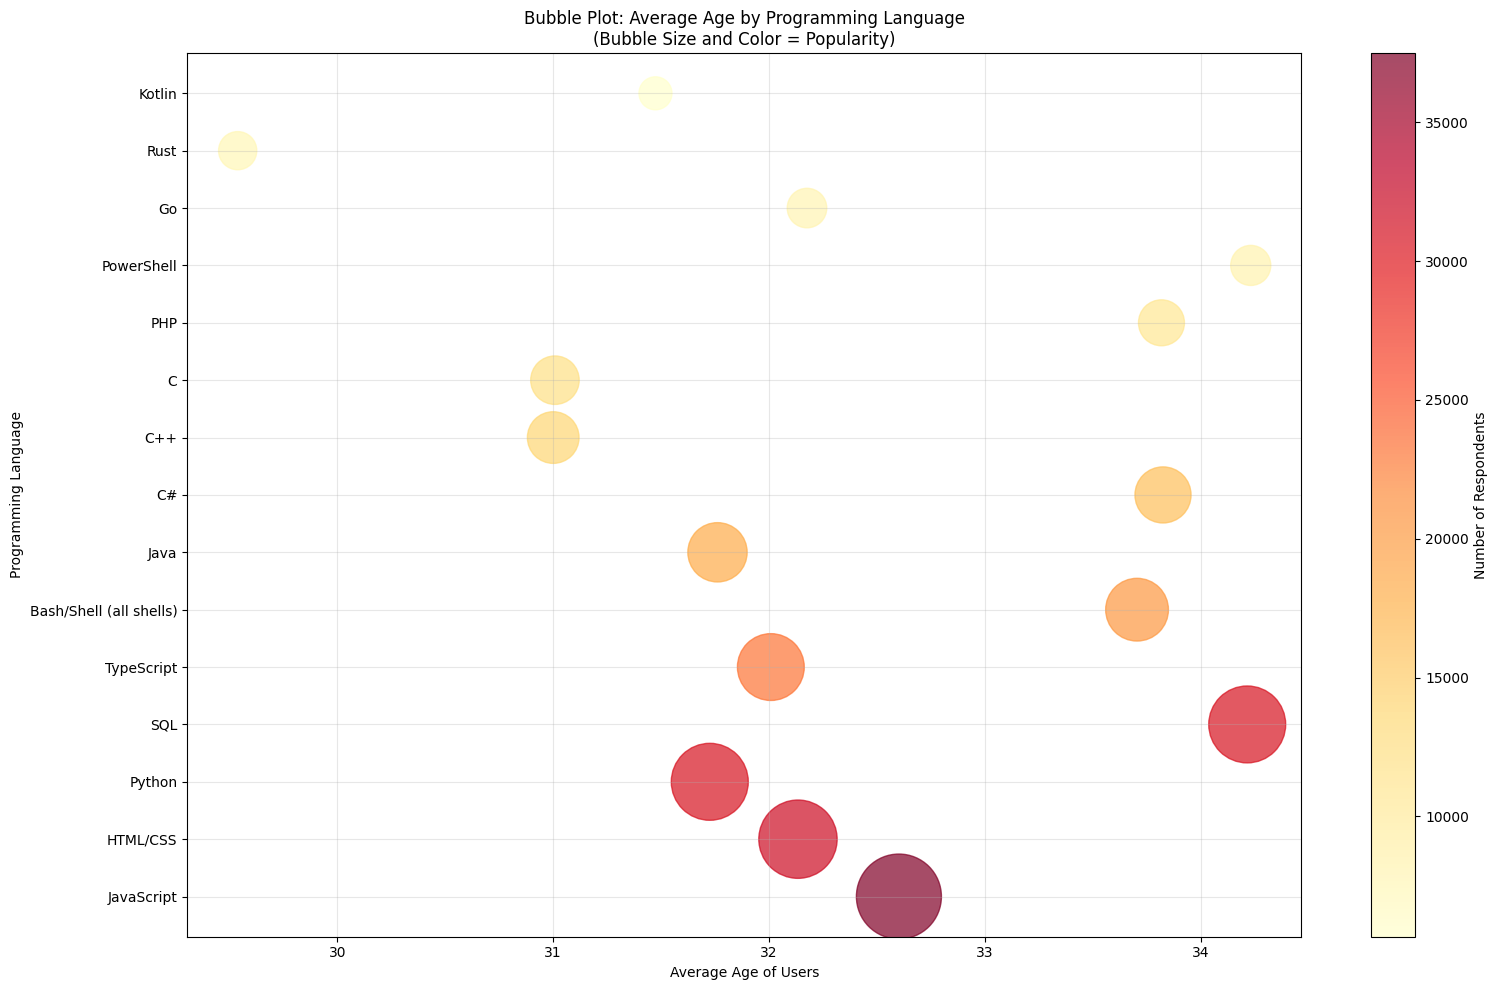

In [38]:
if 'LanguageHaveWorkedWith' in df.columns and 'Age' in df.columns:
    # Extract and count languages
    all_languages = []
    age_languages = []

    for idx, row in df.dropna(subset=['LanguageHaveWorkedWith', 'Age']).iterrows():
        if row['LanguageHaveWorkedWith']:
            languages = row['LanguageHaveWorkedWith'].split(';')
            all_languages.extend(languages)
            for lang in languages:
                age_languages.append({'Language': lang, 'Age': row['Age']})

    # Get top languages
    top_languages = pd.Series(all_languages).value_counts().head(15).index

    # Prepare data for bubble plot
    bubble_data = []
    def age_to_numeric(age_range):
        if isinstance(age_range, str):
            if 'Under 18' in age_range:
                return 10  # Approximate midpoint
            elif '18-24' in age_range:
                return 21
            elif '25-34' in age_range:
                return 30
            elif '35-44' in age_range:
                return 40
            elif '45-54' in age_range:
                return 50
            elif '55-64' in age_range:
                return 60
            elif '65 years or older' in age_range:
                return 70 # Approximate midpoint
        return None

    for lang in top_languages:
        lang_ages_numeric = [age_to_numeric(item['Age']) for item in age_languages if item['Language'] == lang and age_to_numeric(item['Age']) is not None]
        if lang_ages_numeric:
            avg_age = np.mean(lang_ages_numeric)
            count = len([item for item in age_languages if item['Language'] == lang]) # Count original entries
            bubble_data.append({'Language': lang, 'AvgAge': avg_age, 'Count': count})

    bubble_df = pd.DataFrame(bubble_data)

    plt.figure(figsize=(16, 10))
    scatter = plt.scatter(bubble_df['AvgAge'], bubble_df['Language'],
                         s=bubble_df['Count']/10,  # Bubble size based on count
                         alpha=0.7,
                         c=bubble_df['Count'],  # Color based on count
                         cmap='YlOrRd')

    plt.colorbar(scatter, label='Number of Respondents')
    plt.title('Bubble Plot: Average Age by Programming Language\n(Bubble Size and Color = Popularity)')
    plt.xlabel('Average Age of Users')
    plt.ylabel('Programming Language')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found for this analysis")

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


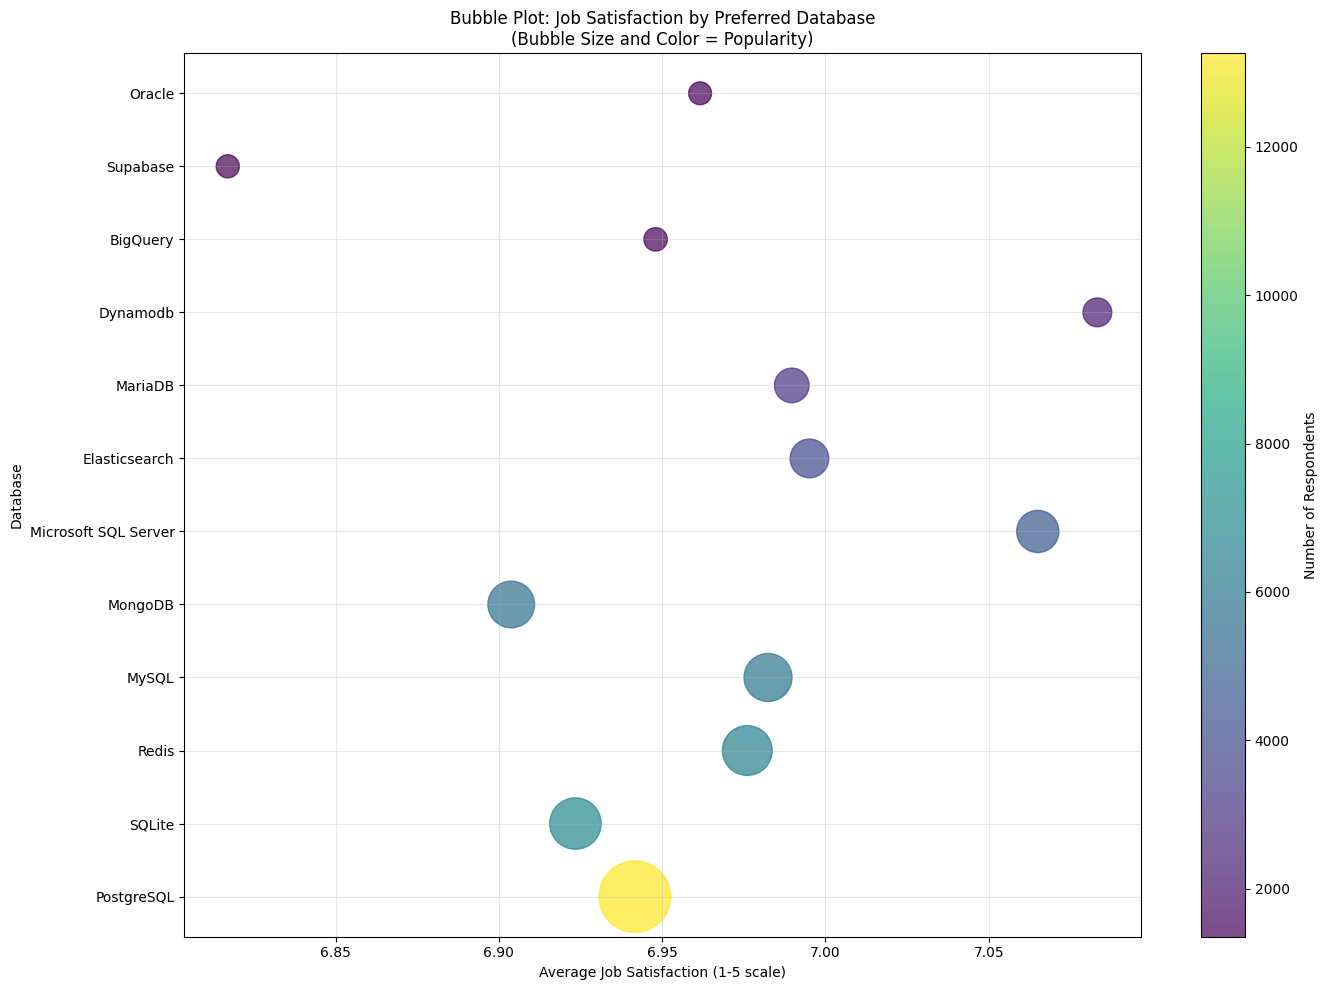

In [40]:
if 'DatabaseWantToWorkWith' in df.columns and 'JobSat' in df.columns:
    # Extract and count databases
    all_databases = []
    db_jobsat = []

    for idx, row in df.dropna(subset=['DatabaseWantToWorkWith', 'JobSat']).iterrows():
        if row['DatabaseWantToWorkWith']:
            databases = row['DatabaseWantToWorkWith'].split(';')
            all_databases.extend(databases)
            for db in databases:
                db_jobsat.append({'Database': db, 'JobSat': row['JobSat']})

    # Get top databases
    top_databases = pd.Series(all_databases).value_counts().head(12).index

    # Prepare data for bubble plot
    bubble_data = []
    for db in top_databases:
        db_satisfaction = [item['JobSat'] for item in db_jobsat if item['Database'] == db]
        if db_satisfaction:
            avg_jobsat = np.mean(db_satisfaction)
            count = len(db_satisfaction)
            bubble_data.append({'Database': db, 'AvgJobSat': avg_jobsat, 'Count': count})

    bubble_df = pd.DataFrame(bubble_data)

    plt.figure(figsize=(14, 10))
    scatter = plt.scatter(bubble_df['AvgJobSat'], bubble_df['Database'],
                         s=bubble_df['Count']/5,  # Bubble size based on count
                         alpha=0.7,
                         c=bubble_df['Count'],  # Color based on count
                         cmap='viridis')

    plt.colorbar(scatter, label='Number of Respondents')
    plt.title('Bubble Plot: Job Satisfaction by Preferred Database\n(Bubble Size and Color = Popularity)')
    plt.xlabel('Average Job Satisfaction (1-5 scale)')
    plt.ylabel('Database')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found for this analysis")

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


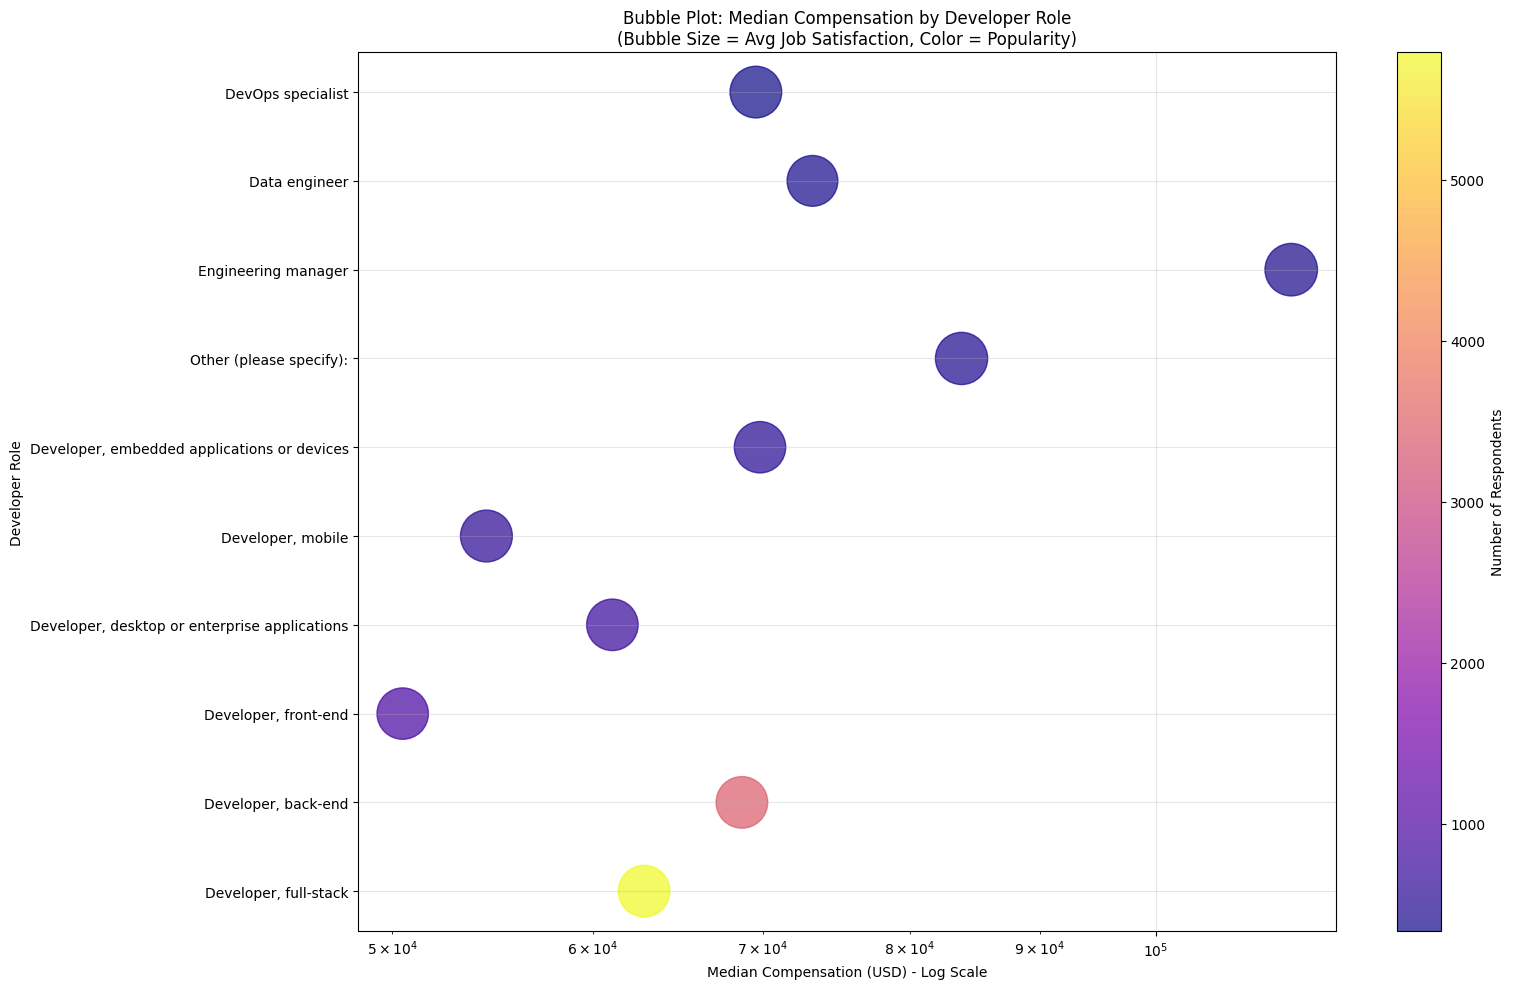

In [41]:
if 'DevType' in df.columns and 'ConvertedCompYearly' in df.columns and 'JobSat' in df.columns:
    # Extract and process developer types
    all_devtypes = []
    devtype_data = []

    for idx, row in df.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat']).iterrows():
        if row['DevType'] and row['ConvertedCompYearly'] > 0:
            devtypes = row['DevType'].split(';')
            all_devtypes.extend(devtypes)
            for devtype in devtypes:
                devtype_data.append({
                    'DevType': devtype,
                    'Compensation': row['ConvertedCompYearly'],
                    'JobSat': row['JobSat']
                })

    # Get top developer types
    top_devtypes = pd.Series(all_devtypes).value_counts().head(10).index

    # Prepare data for bubble plot
    bubble_data = []
    for devtype in top_devtypes:
        devtype_comps = [item['Compensation'] for item in devtype_data if item['DevType'] == devtype]
        devtype_jobsat = [item['JobSat'] for item in devtype_data if item['DevType'] == devtype]

        if devtype_comps:
            median_comp = np.median(devtype_comps)
            avg_jobsat = np.mean(devtype_jobsat)
            count = len(devtype_comps)
            bubble_data.append({
                'DevType': devtype,
                'MedianComp': median_comp,
                'AvgJobSat': avg_jobsat,
                'Count': count
            })

    bubble_df = pd.DataFrame(bubble_data)

    plt.figure(figsize=(16, 10))
    scatter = plt.scatter(bubble_df['MedianComp'], bubble_df['DevType'],
                         s=bubble_df['AvgJobSat']*200,  # Bubble size based on job satisfaction
                         alpha=0.7,
                         c=bubble_df['Count'],  # Color based on count
                         cmap='plasma')

    plt.colorbar(scatter, label='Number of Respondents')
    plt.title('Bubble Plot: Median Compensation by Developer Role\n(Bubble Size = Avg Job Satisfaction, Color = Popularity)')
    plt.xlabel('Median Compensation (USD) - Log Scale')
    plt.ylabel('Developer Role')
    plt.xscale('log')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found for this analysis")

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


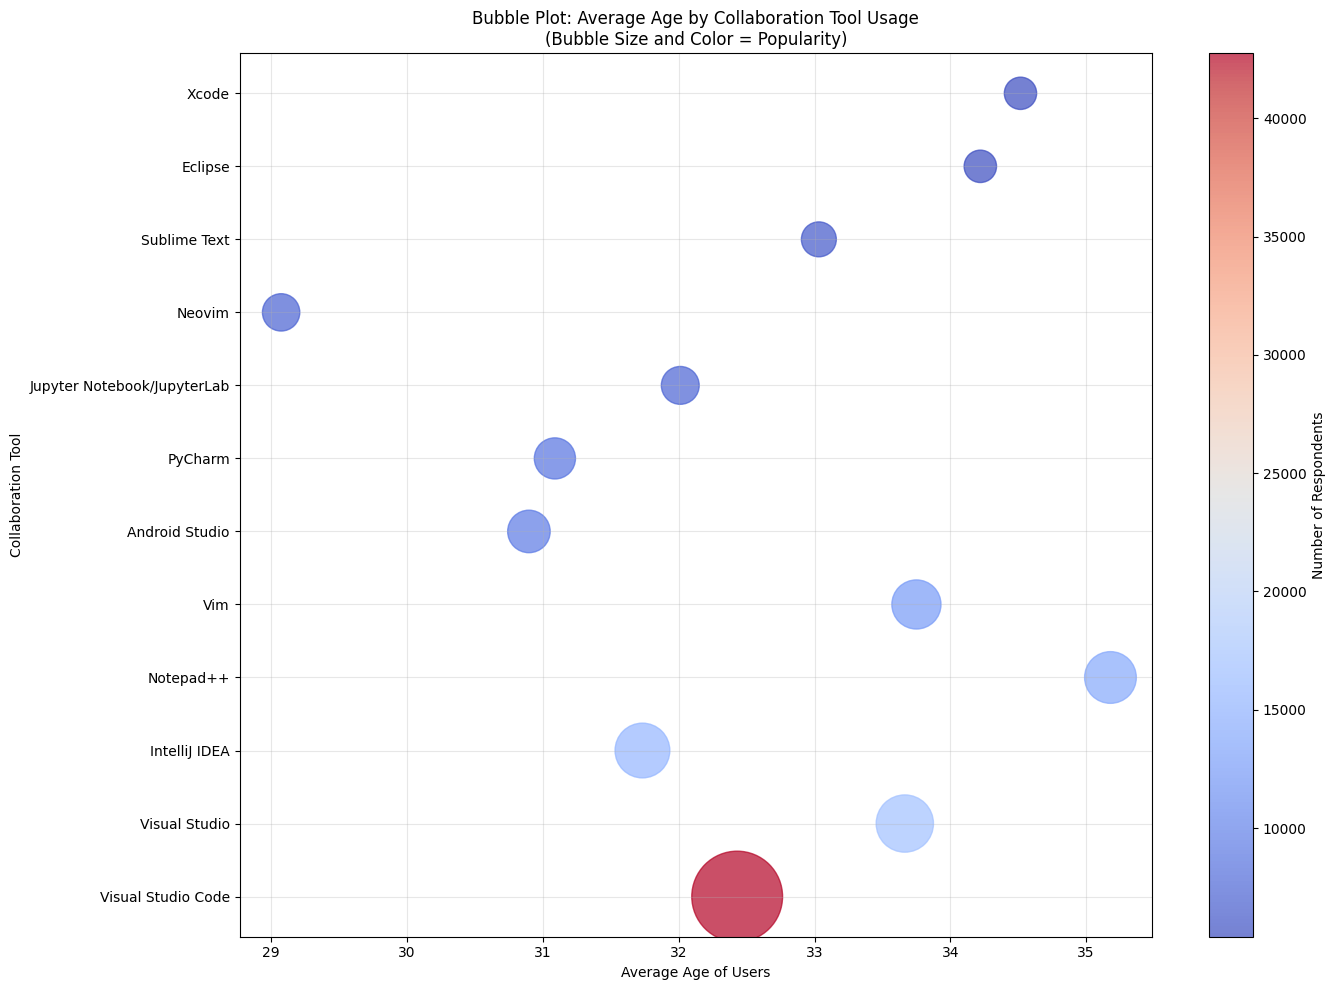

In [44]:
if 'NEWCollabToolsHaveWorkedWith' in df.columns and 'Age' in df.columns:
    # Extract and process collaboration tools
    all_tools = []
    tool_age_data = []

    for idx, row in df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'Age']).iterrows():
        if row['NEWCollabToolsHaveWorkedWith']:
            tools = row['NEWCollabToolsHaveWorkedWith'].split(';')
            all_tools.extend(tools)
            for tool in tools:
                tool_age_data.append({'Tool': tool, 'Age': row['Age']})

    # Get top tools
    top_tools = pd.Series(all_tools).value_counts().head(12).index

    # Prepare data for bubble plot
    bubble_data = []
    def age_to_numeric(age_range):
        if isinstance(age_range, str):
            if 'Under 18' in age_range:
                return 10  # Approximate midpoint
            elif '18-24' in age_range:
                return 21
            elif '25-34' in age_range:
                return 30
            elif '35-44' in age_range:
                return 40
            elif '45-54' in age_range:
                return 50
            elif '55-64' in age_range:
                return 60
            elif '65 years or older' in age_range:
                return 70 # Approximate midpoint
        return None

    for tool in top_tools:
        tool_ages_numeric = [age_to_numeric(item['Age']) for item in tool_age_data if item['Tool'] == tool and age_to_numeric(item['Age']) is not None]
        if tool_ages_numeric:
            avg_age = np.mean(tool_ages_numeric)
            count = len([item for item in tool_age_data if item['Tool'] == tool]) # Count original entries
            bubble_data.append({'Tool': tool, 'AvgAge': avg_age, 'Count': count})

    bubble_df = pd.DataFrame(bubble_data)

    plt.figure(figsize=(14, 10))
    scatter = plt.scatter(bubble_df['AvgAge'], bubble_df['Tool'],
                         s=bubble_df['Count']/10,  # Bubble size based on count
                         alpha=0.7,
                         c=bubble_df['Count'],  # Color based on count
                         cmap='coolwarm')

    plt.colorbar(scatter, label='Number of Respondents')
    plt.title('Bubble Plot: Average Age by Collaboration Tool Usage\n(Bubble Size and Color = Popularity)')
    plt.xlabel('Average Age of Users')
    plt.ylabel('Collaboration Tool')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found for this analysis")

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



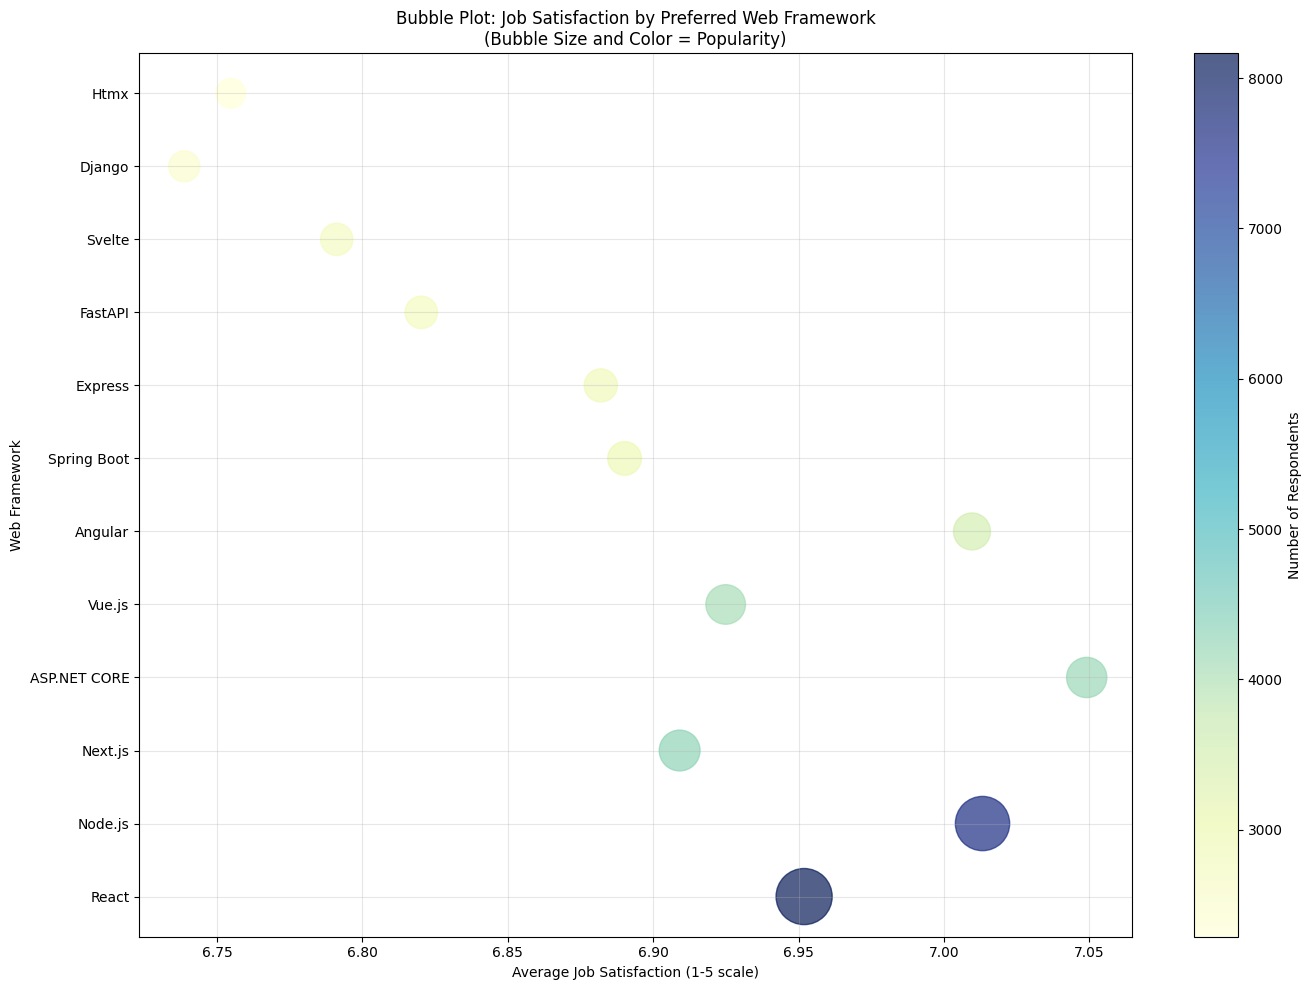

In [46]:
if 'WebframeWantToWorkWith' in df.columns and 'JobSat' in df.columns:
    # Extract and process web frameworks
    all_frameworks = []
    framework_data = []

    for idx, row in df.dropna(subset=['WebframeWantToWorkWith', 'JobSat']).iterrows():
        if row['WebframeWantToWorkWith']:
            frameworks = row['WebframeWantToWorkWith'].split(';')
            all_frameworks.extend(frameworks)
            for framework in frameworks:
                framework_data.append({'Framework': framework, 'JobSat': row['JobSat']})

    # Get top frameworks
    top_frameworks = pd.Series(all_frameworks).value_counts().head(12).index

    # Prepare data for bubble plot
    bubble_data = []
    for framework in top_frameworks:
        framework_satisfaction = [item['JobSat'] for item in framework_data if item['Framework'] == framework]
        if framework_satisfaction:
            avg_jobsat = np.mean(framework_satisfaction)
            count = len(framework_satisfaction)
            bubble_data.append({'Framework': framework, 'AvgJobSat': avg_jobsat, 'Count': count})

    bubble_df = pd.DataFrame(bubble_data)

    plt.figure(figsize=(14, 10))
    scatter = plt.scatter(bubble_df['AvgJobSat'], bubble_df['Framework'],
                         s=bubble_df['Count']/5,  # Bubble size based on count
                         alpha=0.7,
                         c=bubble_df['Count'],  # Color based on count
                         cmap='YlGnBu')

    plt.colorbar(scatter, label='Number of Respondents')
    plt.title('Bubble Plot: Job Satisfaction by Preferred Web Framework\n(Bubble Size and Color = Popularity)')
    plt.xlabel('Average Job Satisfaction (1-5 scale)')
    plt.ylabel('Web Framework')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found for this analysis")

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



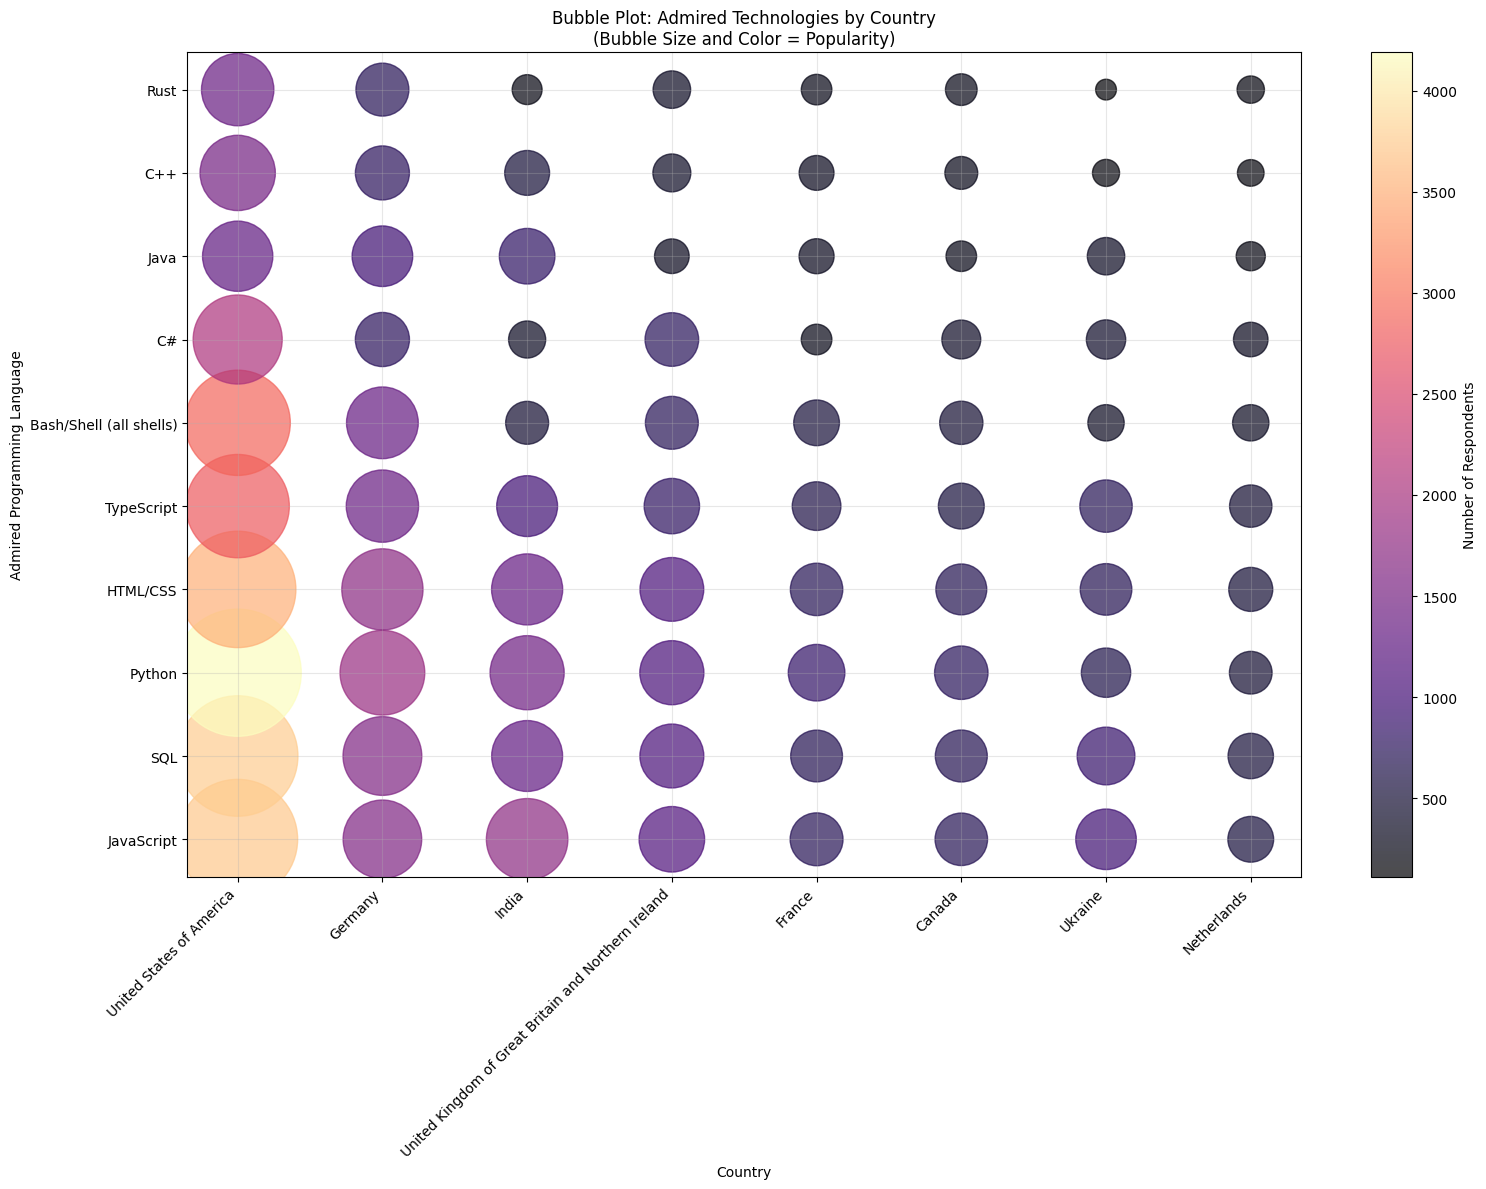

In [47]:
if 'LanguageAdmired' in df.columns and 'Country' in df.columns:
    # Extract and process admired languages
    all_admired = []
    country_admired = []

    for idx, row in df.dropna(subset=['LanguageAdmired', 'Country']).iterrows():
        if row['LanguageAdmired']:
            languages = row['LanguageAdmired'].split(';')
            all_admired.extend(languages)
            for lang in languages:
                country_admired.append({'Language': lang, 'Country': row['Country']})

    # Get top countries and languages
    top_countries = pd.Series([item['Country'] for item in country_admired]).value_counts().head(8).index
    top_languages = pd.Series(all_admired).value_counts().head(10).index

    # Prepare data for bubble plot
    bubble_data = []
    for country in top_countries:
        for language in top_languages:
            count = len([item for item in country_admired if item['Country'] == country and item['Language'] == language])
            if count > 0:
                bubble_data.append({'Country': country, 'Language': language, 'Count': count})

    bubble_df = pd.DataFrame(bubble_data)

    plt.figure(figsize=(16, 12))
    scatter = plt.scatter(bubble_df['Country'], bubble_df['Language'],
                         s=bubble_df['Count']*2,  # Bubble size based on count
                         alpha=0.7,
                         c=bubble_df['Count'],  # Color based on count
                         cmap='magma')

    plt.colorbar(scatter, label='Number of Respondents')
    plt.title('Bubble Plot: Admired Technologies by Country\n(Bubble Size and Color = Popularity)')
    plt.xlabel('Country')
    plt.ylabel('Admired Programming Language')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found for this analysis")

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
